In [19]:
import numpy as np
import random
import gymnasium as gym
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [20]:
env = gym.make('FrozenLake-v1')

In [21]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

rewards_averaged = []



In [27]:
num_episodes = 50000
max_steps = 1000

learning_rate = 0.1
discount = 0.99
epsilon = 0
epsilon_decay = 0.9999

In [28]:
reward_list = []
for episode in range(num_episodes):

    state = env.reset()[0]
    total_reward = 0



    for step in range(max_steps):

        if random.random() > epsilon:
            action = np.argmax(q_table[state,:])
        else:
            action = random.randint(0, action_space_size - 1)


        new_state, reward, terminated, truncated, info = env.step(action)


        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount * np.max(q_table[new_state,:]))


        state = new_state

        total_reward += reward

        if terminated:

            break

        epsilon *= epsilon_decay

    rewards_list.append(total_reward)




Completed! 


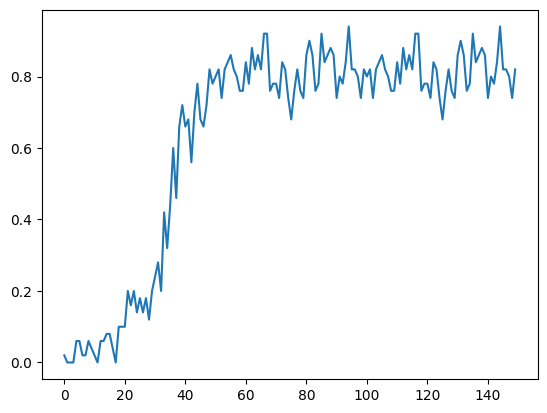

In [29]:

print('Completed! ')


number_elements_shown = 50
elements_in_avg = len(rewards_list) / number_elements_shown
for average in range(number_elements_shown):

    rewards_averaged.append(np.average(rewards_list[average * number_elements_shown : average * number_elements_shown + number_elements_shown]))

    




plt.plot(rewards_averaged)
